In [16]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

403 171


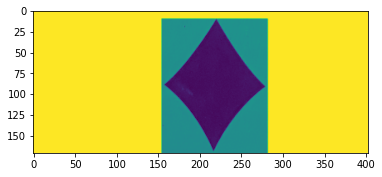

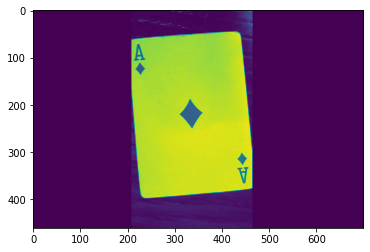

In [17]:
template = cv2.imread('/home/kawsar/Desktop/Deep Learning/Object Detection/template.png',0)
image = cv2.imread('/home/kawsar/Desktop/Deep Learning/Object Detection/image.png',0)

w, h = template.shape[::-1]

print(w,h)

plt.imshow(template)
plt.show()

plt.imshow(image)
plt.show()

In [18]:
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']


In [19]:
img2 = image.copy()

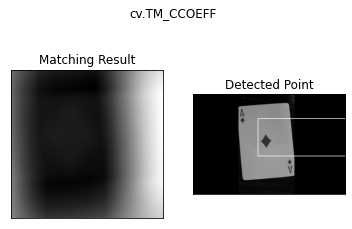

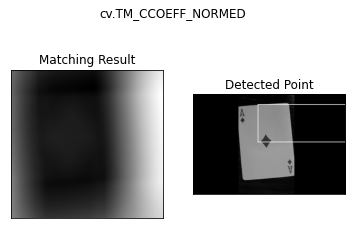

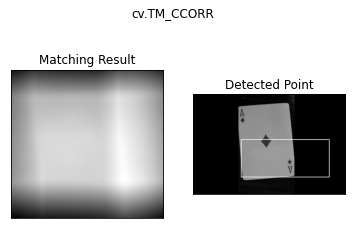

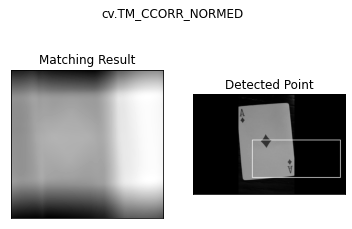

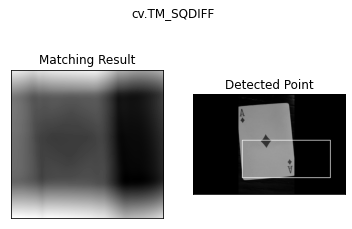

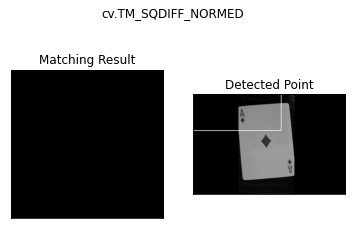

In [20]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
     # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    plt.subplot(121),
    plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'),
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(122),
    plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), 
    plt.xticks([]), plt.yticks([])
    
    plt.suptitle(meth)
    plt.show()